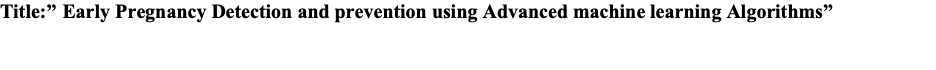

In [14]:
!pip install tensorflow



# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History


# Load and Preprocess the Data

In [16]:


# Load the dataset
data = pd.read_csv('/content/large_dataset_Diagnosis.csv')


#  Load and Preprocess the Dataset

In [17]:
print(data.select_dtypes(include=['object']).columns)


Index(['Residence', 'Education Status', 'Occupation', 'Socioeconomic status',
       'Parity', 'Dressing style', 'Sunlight exposure',
       'Dairy productis consumption', 'Multivitamin use', 'Season',
       'Vitamin D status (ng/mL)', 'Pregnancy loss',
       'History of Pregnancy Loss', 'Underlying Health Conditions',
       'Physical Activity Level', 'Dietary Habits',
       'Family History of Pregnancy Complications', 'Stress Level',
       'Sleep Patterns', 'Exposure to Environmental Toxins'],
      dtype='object')


In [18]:
categorical_features = [
    'Residence', 'Education Status', 'Occupation', 'Socioeconomic status',
    'Parity', 'Dressing style', 'Sunlight exposure',
    'Dairy productis consumption', 'Multivitamin use', 'Season',
    'History of Pregnancy Loss', 'Underlying Health Conditions',
    'Physical Activity Level', 'Dietary Habits',
    'Family History of Pregnancy Complications', 'Stress Level',
    'Sleep Patterns', 'Exposure to Environmental Toxins'
]


In [19]:
data_encoded = pd.get_dummies(data, columns=categorical_features)


In [20]:
data_encoded['Pregnancy loss'] = data_encoded['Pregnancy loss'].map({'Yes': 1, 'No': 0})


# once unknown which column contain insufficient then this codde to prin it out

In [21]:
for column in data.columns:
    if data[column].dtype == 'object':  # Looking for non-numeric columns
        print(f"{column}: {data[column].unique()}")


Residence: ['Rural area' 'Urban']
Education Status: ['Secondary' 'HSC' 'Primary' 'Graduate' 'Postgraduate']
Occupation: ['Housewife' 'Labour' 'Service' 'Student' 'Business']
Socioeconomic status: ['Lower-middle-income' 'Lower-income' 'High-income' 'Upper-middle-income']
Parity: ['Multiparous' 'Nulliparous']
Dressing style: ['Uncovered' 'Covered']
Sunlight exposure: ['Non-exposure' 'Exposure']
Dairy productis consumption: ['Yes' 'No']
Multivitamin use: ['No' 'Yes']
Season: ['Winter' 'Rainy' 'Summer']
Vitamin D status (ng/mL): ['Insufficiency' 'Sufficiency' 'Severe deficiency' 'Deficiency']
Pregnancy loss: ['No' 'Yes']
History of Pregnancy Loss: ['No' 'Yes']
Underlying Health Conditions: ['None' 'Autoimmune Diseases' 'Diabetes' 'Thyroid Disorders']
Physical Activity Level: ['Low' 'Moderate' 'High']
Dietary Habits: ['Poor' 'Good' 'Average']
Family History of Pregnancy Complications: ['No' 'Yes']
Stress Level: ['High' 'Moderate' 'Low']
Sleep Patterns: ['Poor' 'Average' 'Good']
Exposure to 

In [22]:
print(data_encoded.columns)


Index(['ID', 'Age', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)',
       'Vitamin D status (ng/mL)', 'Pregnancy loss', 'Residence_Rural area',
       'Residence_Urban', 'Education Status_Graduate', 'Education Status_HSC',
       'Education Status_Postgraduate', 'Education Status_Primary',
       'Education Status_Secondary', 'Occupation_Business',
       'Occupation_Housewife', 'Occupation_Labour', 'Occupation_Service',
       'Occupation_Student', 'Socioeconomic status_High-income',
       'Socioeconomic status_Lower-income',
       'Socioeconomic status_Lower-middle-income',
       'Socioeconomic status_Upper-middle-income', 'Parity_Multiparous',
       'Parity_Nulliparous', 'Dressing style_Covered',
       'Dressing style_Uncovered', 'Sunlight exposure_Exposure',
       'Sunlight exposure_Non-exposure', 'Dairy productis consumption_No',
       'Dairy productis consumption_Yes', 'Multivitamin use_No',
       'Multivitamin use_Yes', 'S

In [23]:
pip show tensorflow


Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
680/680 - 4s - 5ms/step - accuracy: 0.7953 - loss: 0.5192 - val_accuracy: 0.8092 - val_loss: 0.4983
Epoch 2/100
680/680 - 1s - 2ms/step - accuracy: 0.7962 - loss: 0.4997 - val_accuracy: 0.8092 - val_loss: 0.5022
Epoch 3/100
680/680 - 1s - 2ms/step - accuracy: 0.7962 - loss: 0.4851 - val_accuracy: 0.8092 - val_loss: 0.5249
Epoch 4/100
680/680 - 2s - 4ms/step - accuracy: 0.7962 - loss: 0.4691 - val_accuracy: 0.8042 - val_loss: 0.5287
Epoch 5/100
680/680 - 1s - 2ms/step - accuracy: 0.8040 - loss: 0.4375 - val_accuracy: 0.8100 - val_loss: 0.5750
Epoch 6/100
680/680 - 1s - 2ms/step - accuracy: 0.8216 - loss: 0.4005 - val_accuracy: 0.7917 - val_loss: 0.6216
Epoch 7/100
680/680 - 1s - 2ms/step - accuracy: 0.8435 - loss: 0.3540 - val_accuracy: 0.7742 - val_loss: 0.6326
Epoch 8/100
680/680 - 1s - 2ms/step - accuracy: 0.8701 - loss: 0.3028 - val_accuracy: 0.7508 - val_loss: 0.7217
Epoch 9/100
680/680 - 1s - 2ms/step - accuracy: 0.8918 - loss: 0.2578 - val_accuracy: 0.7383 - val_loss:

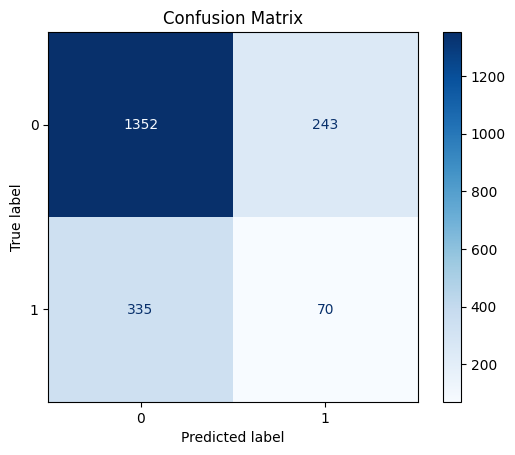

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Assuming 'data' is your DataFrame loaded with the dataset

# Convert all categorical variables to one-hot encoding, including 'Vitamin D status (ng/mL)'
categorical_features = [
    'Residence', 'Education Status', 'Occupation', 'Socioeconomic status',
    'Parity', 'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
    'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)', 'History of Pregnancy Loss',
    'Underlying Health Conditions', 'Physical Activity Level', 'Dietary Habits',
    'Family History of Pregnancy Complications', 'Stress Level', 'Sleep Patterns',
    'Exposure to Environmental Toxins'
]
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Map 'Pregnancy loss' from 'Yes'/'No' to 1/0
data_encoded['Pregnancy loss'] = data_encoded['Pregnancy loss'].map({'Yes': 1, 'No': 0})

# Split the data into features (X) and target (y)
X = data_encoded.drop('Pregnancy loss', axis=1)
y = data_encoded['Pregnancy loss']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

history = model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=10, verbose=2)

loss, accuracy = model.evaluate(X_train, y_train)
loss, accuracy = model.evaluate(X_test, y_test)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Plot Epoch vs Accuracy and Loss


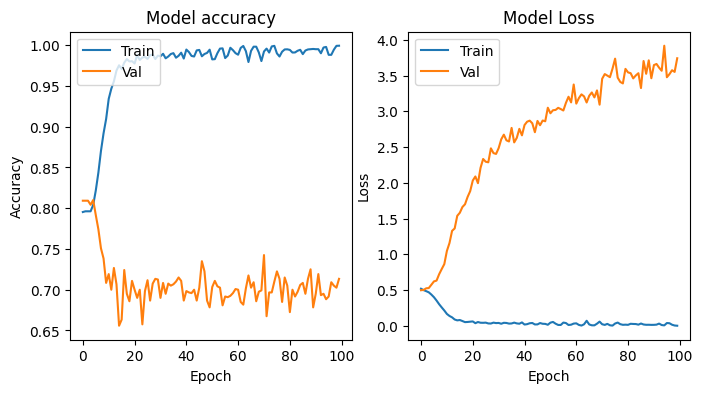

In [30]:
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()


In [ ]:
pip install -U scikit-learn


# Evaluate the model:

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7196 - loss: 3.5328
Test Loss: 3.573028564453125
Test Accuracy: 0.7110000252723694
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1595
           1       0.22      0.17      0.19       405

    accuracy                           0.71      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.71      0.70      2000



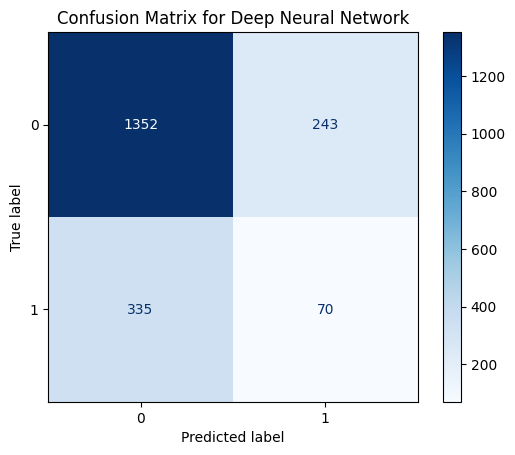

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming model, X_test, and y_test are already defined and available
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred = model.predict(X_test)

# If your model outputs one-hot encoded predictions, you'll need to convert these predictions
# This step is necessary if your y_test is not one-hot encoded
y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Deep Neural Network")
plt.show()


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model(n_units=(128, 64, 32), dropout_rate=0.5, learning_rate=0.001):
    model = Sequential([
        Dense(n_units[0], activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(n_units[1], activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(n_units[2], activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [32]:
# Example hyperparameters to tune
learning_rates = [0.001, 0.0001]
n_units_options = [(128, 64, 32), (256, 128, 64)]
dropout_rates = [0.5, 0.3]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for n_units in n_units_options:
        for dropout_rate in dropout_rates:
            model = build_model(n_units=n_units, dropout_rate=dropout_rate, learning_rate=lr)
            history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=0) # Reduced epochs for demonstration

            # Evaluate the model
            _, accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"LR={lr}, Units={n_units}, Dropout={dropout_rate}, Accuracy={accuracy}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'n_units': n_units, 'dropout_rate': dropout_rate}

print("Best Parameters:", best_params)


LR=0.001, Units=(128, 64, 32), Dropout=0.5, Accuracy=0.7975000143051147
LR=0.001, Units=(128, 64, 32), Dropout=0.3, Accuracy=0.7975000143051147
LR=0.001, Units=(256, 128, 64), Dropout=0.5, Accuracy=0.7975000143051147
LR=0.001, Units=(256, 128, 64), Dropout=0.3, Accuracy=0.7944999933242798
LR=0.0001, Units=(128, 64, 32), Dropout=0.5, Accuracy=0.7975000143051147
LR=0.0001, Units=(128, 64, 32), Dropout=0.3, Accuracy=0.7940000295639038
LR=0.0001, Units=(256, 128, 64), Dropout=0.5, Accuracy=0.796999990940094
LR=0.0001, Units=(256, 128, 64), Dropout=0.3, Accuracy=0.7944999933242798
Best Parameters: {'learning_rate': 0.001, 'n_units': (128, 64, 32), 'dropout_rate': 0.5}


#Retrain the Model with Best Parameters


In [33]:
model = build_model(n_units=(128, 64, 32), dropout_rate=0.5, learning_rate=0.001)
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)


Epoch 1/100
800/800 - 8s - 11ms/step - accuracy: 0.6896 - loss: 0.6436
Epoch 2/100
800/800 - 1s - 2ms/step - accuracy: 0.7895 - loss: 0.5325
Epoch 3/100
800/800 - 1s - 2ms/step - accuracy: 0.7977 - loss: 0.5148
Epoch 4/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5122
Epoch 5/100
800/800 - 3s - 3ms/step - accuracy: 0.7981 - loss: 0.5082
Epoch 6/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5066
Epoch 7/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5043
Epoch 8/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5051
Epoch 9/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5039
Epoch 10/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5031
Epoch 11/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5043
Epoch 12/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5027
Epoch 13/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.4993
Epoch 14/100
800/800 - 1s - 2ms/step - accuracy: 0.7981 - loss: 0.5019
Epoch 15/100
8

# Evaluate the Model

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.33      0.01      0.01       405

    accuracy                           0.80      2000
   macro avg       0.57      0.50      0.45      2000
weighted avg       0.70      0.80      0.71      2000

ROC-AUC Score: 0.5258082743140214


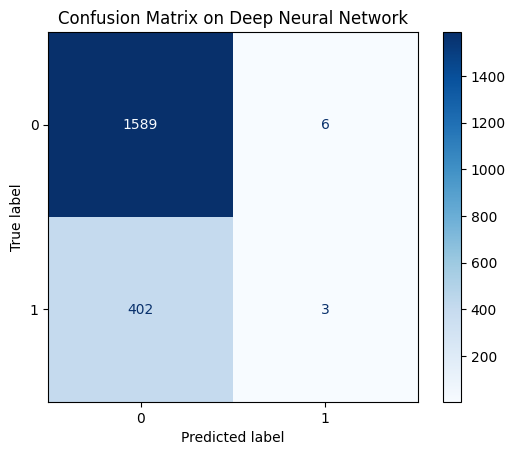

<Figure size 600x400 with 0 Axes>

In [38]:

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Deep Neural Network")
plt.figure(figsize=(6, 4))
plt.show()


Epoch 1/100
200/200 - 7s - 33ms/step - accuracy: 0.7966 - loss: 0.4616 - val_accuracy: 0.8081 - val_loss: 0.4200
Epoch 2/100
200/200 - 0s - 2ms/step - accuracy: 0.8034 - loss: 0.4571 - val_accuracy: 0.8075 - val_loss: 0.4235
Epoch 3/100
200/200 - 0s - 2ms/step - accuracy: 0.8031 - loss: 0.4517 - val_accuracy: 0.8081 - val_loss: 0.4228
Epoch 4/100
200/200 - 0s - 2ms/step - accuracy: 0.7992 - loss: 0.4503 - val_accuracy: 0.8087 - val_loss: 0.4234
Epoch 5/100
200/200 - 0s - 2ms/step - accuracy: 0.7980 - loss: 0.4528 - val_accuracy: 0.8094 - val_loss: 0.4259
Epoch 6/100
200/200 - 0s - 2ms/step - accuracy: 0.8037 - loss: 0.4436 - val_accuracy: 0.8112 - val_loss: 0.4257
Epoch 7/100
200/200 - 0s - 2ms/step - accuracy: 0.8084 - loss: 0.4424 - val_accuracy: 0.8106 - val_loss: 0.4276
Epoch 8/100
200/200 - 0s - 2ms/step - accuracy: 0.7980 - loss: 0.4527 - val_accuracy: 0.8087 - val_loss: 0.4312
Epoch 9/100
200/200 - 0s - 2ms/step - accuracy: 0.8031 - loss: 0.4453 - val_accuracy: 0.8087 - val_loss

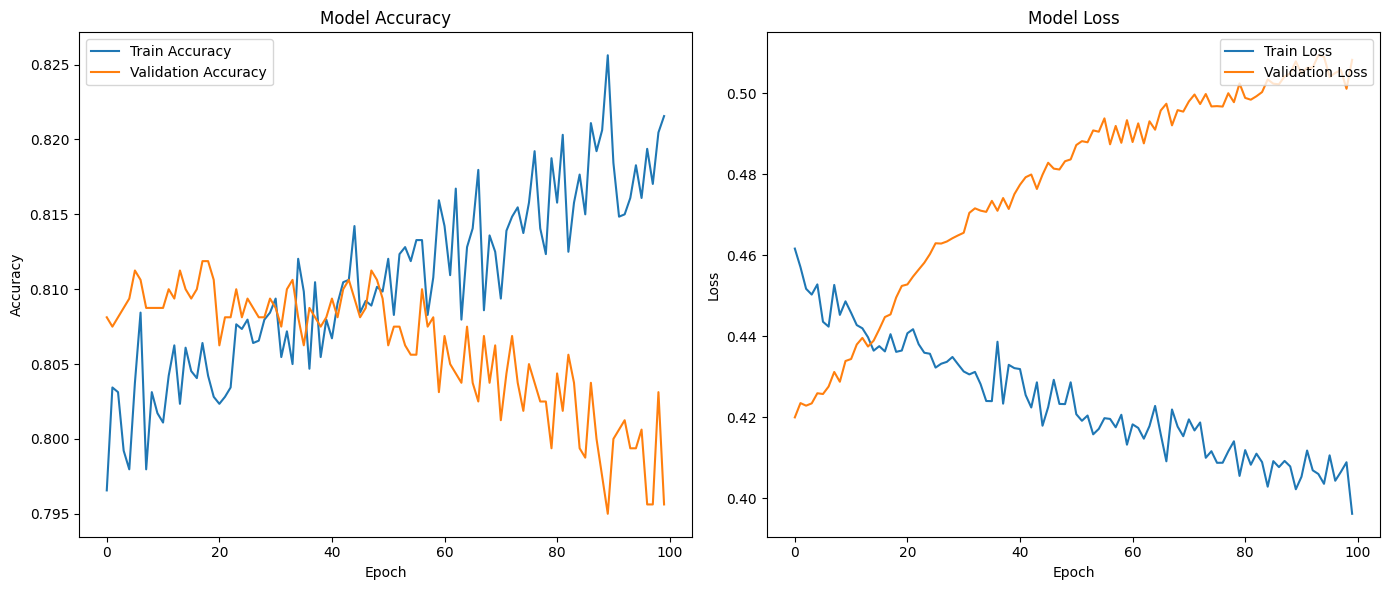

In [43]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable returned by the model.fit() method
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Cross-Validation
The cross validation result has been used to assess the model result finally

In [41]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_folds = 5

# Define the K-fold cross-validator
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# For storing scores
scores = []

for train, test in kfold.split(X_train_resampled, y_train_resampled):
    # Create model
    model = build_model_tuned(X_train_resampled.shape[1])

    # Train model on resampled data
    model.fit(X_train_resampled[train], y_train_resampled[train], epochs=50, batch_size=40, verbose=0)

    # Evaluate model on resampled validation data
    scores.append(model.evaluate(X_train_resampled[test], y_train_resampled[test], verbose=0))

# Convert scores to a numpy array and calculate mean accuracy
scores = np.array(scores)
mean_accuracy = np.mean(scores[:, 1])
print("Cross-Validation Accuracy: {:.2f}%".format(mean_accuracy * 100))


NameError: name 'X_train_resampled' is not defined